#Section 3: Feed Forward NN

In [21]:
import torch
import torch.nn as nn
import torchvision # for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
input_size = 784 # 28X28 images
hidden_size = 100
num_classes = 10 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset from pytorch
train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = True, transform = transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = False, transform = transforms.ToTensor(),download=True)



Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw




Extracting /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/AI-Internship/MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
print(f'length of train_dataset is : {len(train_dataset)} and length of train_loader is : {len(train_loader)}')
print(f'length of test_dataset is : {len(test_dataset)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 60000 and length of train_loader is : 600
length of test_dataset is : 10000 and length of test_loader is : 100


Let's take a look at one batch of this dataset.

In [ ]:
examples = iter(train_loader)
#unpack examples
samples , labels = examples.next()
print(f'samples shape : {samples.shape} ,labels shape : {labels.shape}')

samples shape : torch.Size([100, 1, 28, 28]) ,labels shape : torch.Size([100])


Let's plot 6 images of this batch.

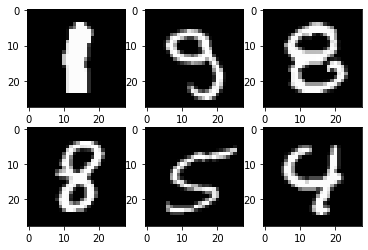

In [ ]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='gray')

In [59]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
# create model
model_mnist = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [ ]:
list = []

for epoch in range(num_epochs):
  for i, (image, label) in enumerate(train_loader):
    # shape of image is 100,1,28,28 , we want to reshape it to 100, 784
    image = image.reshape(-1, 784)

    # forward pass
    y_pred_mnist = model_mnist(image)
    loss = criterion(y_pred_mnist, label)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 100/600, loss : 0.4466 
epoch : 1/2 , step : 200/600, loss : 0.4063 
epoch : 1/2 , step : 300/600, loss : 0.3583 
epoch : 1/2 , step : 400/600, loss : 0.2705 
epoch : 1/2 , step : 500/600, loss : 0.3247 
epoch : 1/2 , step : 600/600, loss : 0.2468 
epoch : 2/2 , step : 100/600, loss : 0.2096 
epoch : 2/2 , step : 200/600, loss : 0.2642 
epoch : 2/2 , step : 300/600, loss : 0.2267 
epoch : 2/2 , step : 400/600, loss : 0.1761 
epoch : 2/2 , step : 500/600, loss : 0.2349 
epoch : 2/2 , step : 600/600, loss : 0.0953 


###Test the model

In [ ]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for image_test, label_test in test_loader:
    
    image_test = image_test.reshape(-1,784)
    output = model_mnist(image_test)

    _, y_pred_test = torch.max(output,1)
    n_true += (y_pred_test == label_test).sum()
    n_total += label.size(0)


print(f'accuracy of model on the 10000 images is : {(n_true/n_total) *100}')


accuracy of model on the 10000 images is : 95.4800033569336


In [ ]:
print(list)

[[1, 100, 0.4466078281402588], [1, 200, 0.40632733702659607], [1, 300, 0.3583229184150696], [1, 400, 0.27051863074302673], [1, 500, 0.3246749937534332], [1, 600, 0.24675136804580688], [2, 100, 0.20962238311767578], [2, 200, 0.2642391324043274], [2, 300, 0.2267332673072815], [2, 400, 0.17606474459171295], [2, 500, 0.23492076992988586], [2, 600, 0.09532473236322403]]


In [ ]:
len(list)

12

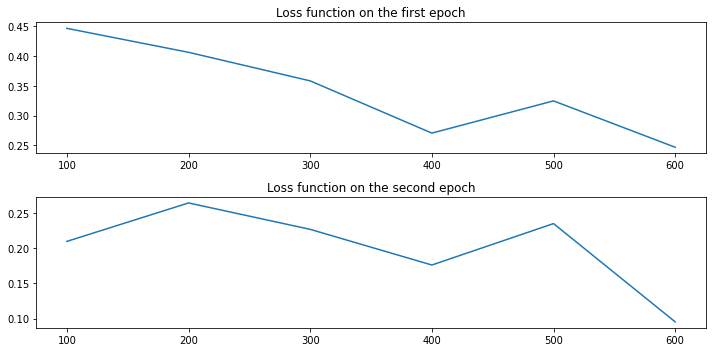

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list[i][1] for i in range(6)] , y = [list[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list[i][1] for i in range(6,len(list))] , y = [list[i][2] for i in range(6,len(list))], ax = axs[1])
plt.tight_layout()

#Heart Disease classification with Feed Forward NN

First we should download the data, then save it in drive.

In [1]:
import requests

url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data'
r = requests.get(url, allow_redirects=True)

open('SAheart.data', 'wb').write(r.content)

25106

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [84]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AI-Internship/SAheart.data')

In [85]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [86]:
data.shape

(462, 11)

In [87]:
data.tail(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [88]:
from sklearn.preprocessing import LabelEncoder

# present: 1 and absent: 0
le = LabelEncoder()
data['famhist'] = le.fit_transform(data['famhist'])

In [89]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


###Split data into train and test

In [90]:
features = data.drop(columns='chd')
target = pd.DataFrame(data['chd'])

In [91]:
print(f'feature shape : {features.shape}')
print(f'target shape : {target.shape}')

feature shape : (462, 10)
target shape : (462, 1)


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

In [93]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (369, 10)
X_test shape : (93, 10)
y_train shape : (369, 1)
y_test shape : (93, 1)


###Standardization

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
print(f'X_train type : {type(X_train)}')

X_train type : <class 'numpy.ndarray'>


###Create tensors and dataloaders

In [96]:
import numpy as np

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [97]:
print(f'y_train type : {type(y_train)}')

y_train type : <class 'torch.Tensor'>


In [98]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [99]:
y_train.shape

torch.Size([369, 1])

In [100]:
from torch.utils.data import DataLoader

X_train_loader = DataLoader(dataset=X_train, batch_size=10, shuffle=True, num_workers=2)
X_test_loader = DataLoader(dataset=X_test, batch_size=10, shuffle=False, num_workers=2)
y_train_loader = DataLoader(dataset=y_train, batch_size=10, shuffle=True, num_workers=2)
y_test_loader = DataLoader(dataset=y_test, batch_size=10, shuffle=False, num_workers=2)

In [101]:
print(f'length of X_train is : {len(X_train)} and length of train_loader is : {len(X_train_loader)}')
print(f'length of X_test is : {len(X_test)} and length of test_loader is : {len(X_test_loader)}')
print(f'length of y_train is : {len(y_train)} and length of train_loader is : {len(y_train_loader)}')
print(f'length of y_test is : {len(y_test)} and length of test_loader is : {len(y_test_loader)}')

length of X_train is : 369 and length of train_loader is : 37
length of X_test is : 93 and length of test_loader is : 10
length of y_train is : 369 and length of train_loader is : 37
length of y_test is : 93 and length of test_loader is : 10


In [102]:
example_x = iter(X_train_loader)
example_y = iter(y_train_loader)

sample_x = example_x.next()
sample_y = example_y.next()

print(f'samples shape : {sample_x.shape} ,labels shape : {sample_y.shape}')

samples shape : torch.Size([10, 10]) ,labels shape : torch.Size([10, 1])


In [103]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    return out

In [112]:
input_size = 10
hidden_size = 5
num_classes = 1
num_epochs = 2
learning_rate = 0.1

# create model
model_hd = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_hd.parameters(), lr= learning_rate)

total_input = len(X_train_loader)

###Train the model

In [113]:
list_hd = []

for epoch in range(num_epochs):
  for i, (x, y) in enumerate(zip(X_train_loader, y_train_loader)):

    # forward pass
    y_pred_hd = model_hd(x)
    loss = criterion(y_pred_hd, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 6 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list_hd.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 6/37, loss : 0.4913 
epoch : 1/2 , step : 12/37, loss : 0.6384 
epoch : 1/2 , step : 18/37, loss : 0.5958 
epoch : 1/2 , step : 24/37, loss : 0.8490 
epoch : 1/2 , step : 30/37, loss : 0.6741 
epoch : 1/2 , step : 36/37, loss : 0.6892 
epoch : 2/2 , step : 6/37, loss : 0.6716 
epoch : 2/2 , step : 12/37, loss : 0.8012 
epoch : 2/2 , step : 18/37, loss : 0.5463 
epoch : 2/2 , step : 24/37, loss : 0.5624 
epoch : 2/2 , step : 30/37, loss : 0.5964 
epoch : 2/2 , step : 36/37, loss : 0.5898 


###Test the model

In [126]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for x_test, y_test in zip(X_test_loader,y_test_loader):
    
    output = model_hd(x_test)

    n_true += (output == y_test).sum()
    n_total += y_test.size(0)


print(f'accuracy of model on the 93 data is : {(n_true/n_total) *100}')


accuracy of model on the 93 data is : 0.0


In [119]:
len(x_test)

3

In [120]:
len(y_test)

3

In [121]:
y_test

tensor([[0.],
        [0.],
        [1.]])

In [122]:
output

tensor([[0.3284],
        [0.3025],
        [0.3373]])